<a href="https://colab.research.google.com/github/Poorni2415/ML-projects/blob/main/Bike_rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

#**Data collection**

In [ ]:
bk=pd.read_csv('/content/day.csv')

**season: 1:winter, 2:spring, 3:summer, 4:fall
 *yr:  year (0: 2011, 1: 2012)
 *month:  month (1 to 12)
 *hr: hour (0 to 23)
 *holiday: whether day is holiday or not
 *weekday: day of the week
 *workingday: if day is neither weekend nor holiday is 1, otherwise is 0
 *weathersit: 	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy**

In [ ]:
bk.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
bk.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
bk.sample()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
79,80,2011-03-21,2,0,3,0,1,1,2,0.430435,0.409735,0.737391,0.288783,401,1676,2077


#**Data cleaning**

In [ ]:
bk.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
bk.shape

(731, 16)

In [ ]:
bk.duplicated().sum()

0

In [ ]:
bk.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [ ]:
bk['dteday'] = pd.to_datetime(bk['dteday'])

In [ ]:
bk

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
bk.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


#**Feature Engineering - Feature creation for efficient prediction**

In [ ]:
bk['year'] = bk['dteday'].dt.year
bk['month'] = bk['dteday'].dt.month
bk['day'] = bk['dteday'].dt.day

In [ ]:
bk

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,12,27
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,12,28
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,12,29
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012,12,30


In [ ]:
bk.drop('dteday',axis=1,inplace=True)

In [ ]:
bk

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,12,27
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,12,28
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,12,29
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012,12,30


#**Data transformation**

In [ ]:
sc = StandardScaler()

In [ ]:
c=sc.fit_transform(bk)

In [ ]:
bk

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,12,27
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,12,28
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,12,29
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012,12,30


In [ ]:
n=MinMaxScaler()
a=n.fit_transform(bk)

In [ ]:
b=pd.DataFrame(a,columns=bk.columns)

In [ ]:
b

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792,0.0,0.0,0.000000
1,0.001370,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623,0.0,0.0,0.033333
2,0.002740,0.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669,0.0,0.0,0.066667
3,0.004110,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174,0.0,0.0,0.100000
4,0.005479,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546,0.0,0.0,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.994521,0.0,1.0,1.0,0.0,0.666667,1.0,0.5,0.243025,0.193709,0.671380,0.675656,0.071890,0.266676,0.240681,1.0,1.0,0.866667
727,0.995890,0.0,1.0,1.0,0.0,0.833333,1.0,0.5,0.241986,0.230993,0.606684,0.274350,0.188380,0.350996,0.353543,1.0,1.0,0.900000
728,0.997260,0.0,1.0,1.0,0.0,1.000000,0.0,0.5,0.241986,0.214393,0.774208,0.210260,0.046068,0.167774,0.151749,1.0,1.0,0.933333
729,0.998630,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.245101,0.200348,0.497001,0.676936,0.106221,0.203869,0.204096,1.0,1.0,0.966667


#**Training the data**

In [ ]:
X=b.drop(columns=['registered'])
Y=b['registered']

In [ ]:
X

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt,year,month,day
0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606,0.096538,0.110792,0.0,0.0,0.000000
1,0.001370,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215,0.037852,0.089623,0.0,0.0,0.033333
2,0.002740,0.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.152669,0.0,0.0,0.066667
3,0.004110,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.607131,0.284297,0.031103,0.177174,0.0,0.0,0.100000
4,0.005479,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.181546,0.0,0.0,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.994521,0.0,1.0,1.0,0.0,0.666667,1.0,0.5,0.243025,0.193709,0.671380,0.675656,0.071890,0.240681,1.0,1.0,0.866667
727,0.995890,0.0,1.0,1.0,0.0,0.833333,1.0,0.5,0.241986,0.230993,0.606684,0.274350,0.188380,0.353543,1.0,1.0,0.900000
728,0.997260,0.0,1.0,1.0,0.0,1.000000,0.0,0.5,0.241986,0.214393,0.774208,0.210260,0.046068,0.151749,1.0,1.0,0.933333
729,0.998630,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.245101,0.200348,0.497001,0.676936,0.106221,0.204096,1.0,1.0,0.966667


In [ ]:
Y

,registered
0,0.091539
1,0.093849
2,0.174560
3,0.207046
4,0.216286
...,...
726,0.266676
727,0.350996
728,0.167774
729,0.203869


#**Handling Outliers**

In [ ]:
out=[]
def outlier(b):
  th=3
  numerical_b = b.select_dtypes(include=np.number)
  for column in numerical_b.columns:
    data = numerical_b[column]
    mean = np.mean(data)
    std = np.std(data)
  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>th:
      out.append(i)
  return out

In [ ]:
o=outlier(b)

In [ ]:
o

[]

#**Data Analysis**

**Univariate Analysis**

In [ ]:
b_ur=pd.DataFrame(b[['workingday','registered']])

In [ ]:
b_ur

,workingday,registered
0,0.0,0.091539
1,0.0,0.093849
2,1.0,0.174560
3,1.0,0.207046
4,1.0,0.216286
...,...,...
726,1.0,0.266676
727,1.0,0.350996
728,0.0,0.167774
729,0.0,0.203869


In [ ]:
b_ur['workingday'].value_counts()

,count
workingday,
1.0,500
0.0,231


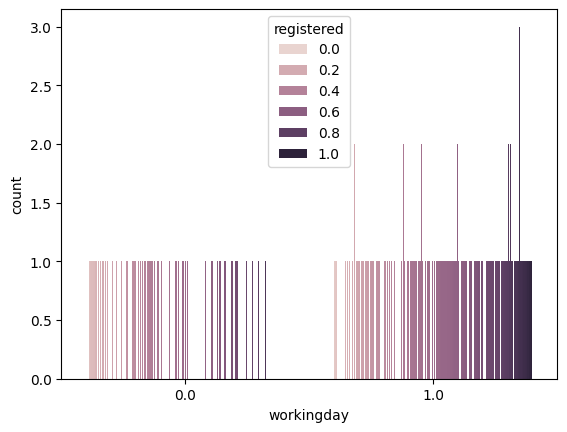

In [ ]:
for i,predictor in enumerate(b_ur.drop(columns=['registered'])):
  plt.figure()
  sns.countplot(data=b_ur,x=predictor,hue='registered')

In [ ]:
b_uc=b_ur=pd.DataFrame(b[['workingday','casual']])

In [ ]:
b_uc

,workingday,casual
0,0.0,0.096538
1,0.0,0.037852
2,1.0,0.034624
3,1.0,0.031103
4,1.0,0.023474
...,...,...
726,1.0,0.071890
727,1.0,0.188380
728,0.0,0.046068
729,0.0,0.106221


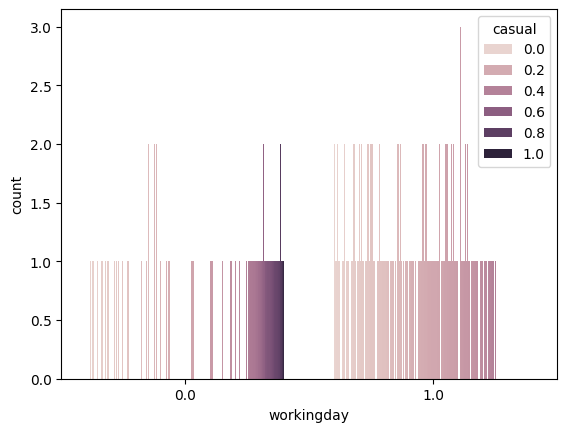

In [ ]:
for i,predictor in enumerate(b_uc.drop(columns=['casual'])):
  plt.figure()
  sns.countplot(data=b_uc,x=predictor,hue='casual')

**Bi-Variate Analysis**

In [ ]:
b_br=pd.DataFrame(b[['workingday','season','registered']])

In [ ]:
b_br

,workingday,season,registered
0,0.0,0.0,0.091539
1,0.0,0.0,0.093849
2,1.0,0.0,0.174560
3,1.0,0.0,0.207046
4,1.0,0.0,0.216286
...,...,...,...
726,1.0,0.0,0.266676
727,1.0,0.0,0.350996
728,0.0,0.0,0.167774
729,0.0,0.0,0.203869


In [ ]:
b_br[['workingday','season']].value_counts()

workingday  season  
1.0         0.666667    131
            0.333333    128
            1.000000    121
            0.000000    120
0.0         0.000000     61
            0.666667     57
            1.000000     57
            0.333333     56
Name: count, dtype: int64

<Axes: xlabel='season', ylabel='Count'>

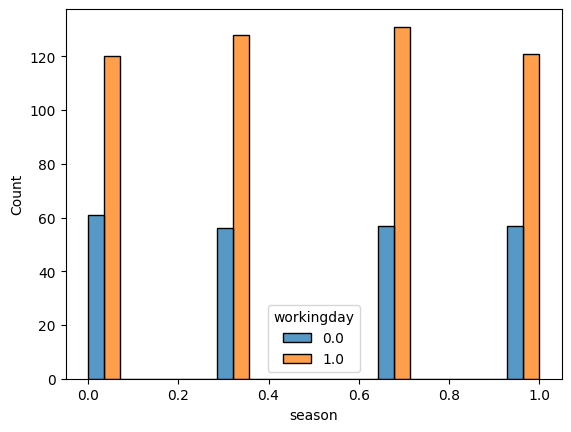

In [ ]:
sns.histplot(x='season',hue='workingday',data=b_ts,stat='count',multiple='dodge')

In [ ]:
b_bc=pd.DataFrame(b[['workingday','season','casual']])

In [ ]:
b_bc

,workingday,season,casual
0,0.0,0.0,0.096538
1,0.0,0.0,0.037852
2,1.0,0.0,0.034624
3,1.0,0.0,0.031103
4,1.0,0.0,0.023474
...,...,...,...
726,1.0,0.0,0.071890
727,1.0,0.0,0.188380
728,0.0,0.0,0.046068
729,0.0,0.0,0.106221


<Axes: xlabel='casual', ylabel='Count'>

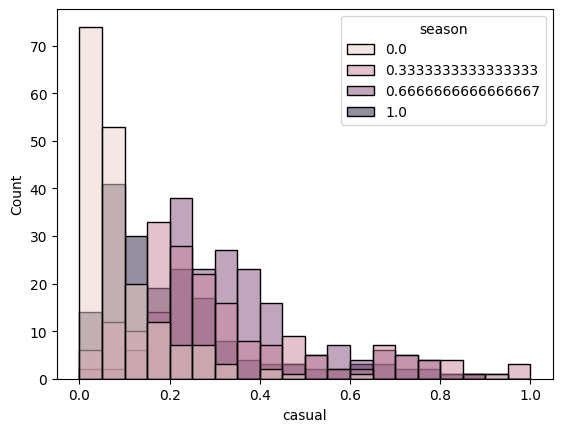

In [ ]:
sns.histplot(x='casual',hue='season',data=b_bc,stat='count')

**Correlation - Multivariate analysis**

In [ ]:
b.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830,0.866025,0.496702,0.047990
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100,-0.001844,0.831440,-0.000861
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710,1.000000,-0.001792,0.002061
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977,-0.001792,1.000000,0.009157
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348,0.007954,0.019191,-0.010710
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443,-0.005461,0.009509,-0.000428
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156,-0.002013,-0.005901,0.009907
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391,-0.048727,0.043528,-0.023824
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,0.047604,0.220205,0.024253
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066,0.046106,0.227459,0.018286


<Axes: >

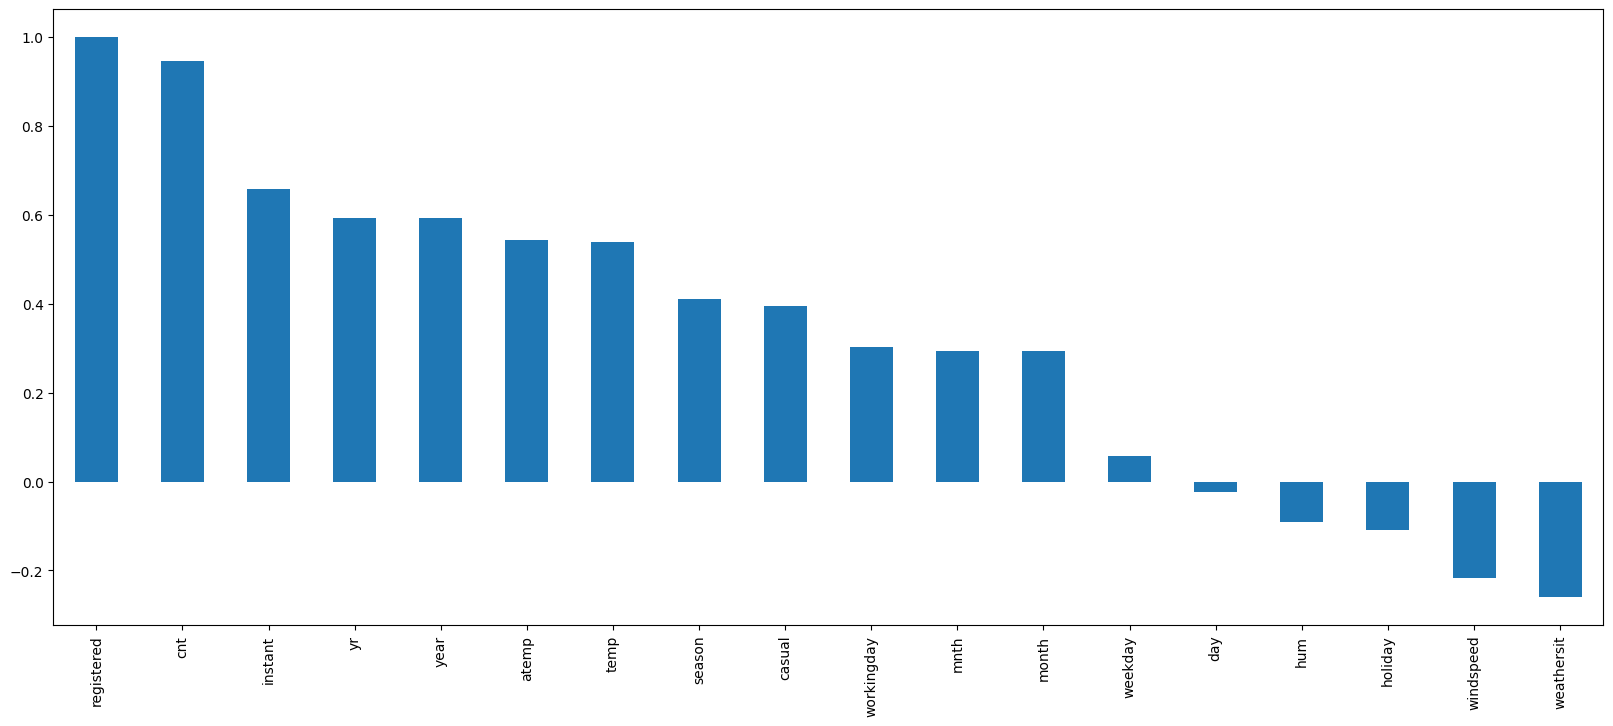

In [ ]:
plt.figure(figsize=(20,8))
b.corr()['registered'].sort_values(ascending=False).plot(kind='bar')

#**Hyperparameter tuning**

# **Linear Regression**

In [ ]:
mod1=LinearRegression()

In [ ]:
par1={'fit_intercept':[True,False],'positive': [True, False],'copy_X':[True,False]}

In [ ]:
ran1 = RandomizedSearchCV(mod1, par1, cv=5)
ran1.fit(X,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'positive': [True, False]})

In [ ]:
ran1.cv_results_

{'mean_fit_time': array([0.00857711, 0.00695152, 0.00764604, 0.00271764, 0.01174445,
        0.0200346 , 0.00616083, 0.01412783]),
 'std_fit_time': array([7.14008196e-03, 1.76788097e-03, 1.90562010e-03, 8.58420259e-05,
        2.01129197e-03, 9.25611279e-03, 1.89375472e-03, 1.19466718e-02]),
 'mean_score_time': array([0.00228143, 0.00278473, 0.0020155 , 0.00707269, 0.00211463,
        0.00432734, 0.00227175, 0.00211024]),
 'std_score_time': array([2.03843786e-04, 1.56045553e-03, 4.59918276e-05, 3.28797105e-03,
        5.21042736e-05, 2.74467905e-03, 1.16931672e-04, 6.73425084e-05]),
 'param_positive': masked_array(data=[True, False, True, False, True, False, True, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=True),
 'param_fit_intercept': masked_array(data=[True, True, False, False, True, True, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=True),
 'param_copy_X': 

In [ ]:
r1=pd.DataFrame(ran1.cv_results_)

In [ ]:
r1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_positive,param_fit_intercept,param_copy_X,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008577,0.007140,0.002281,0.000204,True,True,True,"{'positive': True, 'fit_intercept': True, 'cop...",0.915103,0.889591,0.879991,0.823443,0.934933,0.888612,0.037867,5
1,0.006952,0.001768,0.002785,0.001560,False,True,True,"{'positive': False, 'fit_intercept': True, 'co...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
2,0.007646,0.001906,0.002015,0.000046,True,False,True,"{'positive': True, 'fit_intercept': False, 'co...",0.883547,0.868374,0.927077,0.817680,0.924337,0.884203,0.040312,7
3,0.002718,0.000086,0.007073,0.003288,False,False,True,"{'positive': False, 'fit_intercept': False, 'c...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
4,0.011744,0.002011,0.002115,0.000052,True,True,False,"{'positive': True, 'fit_intercept': True, 'cop...",0.915103,0.889591,0.879991,0.823443,0.934933,0.888612,0.037867,5
5,0.020035,0.009256,0.004327,0.002745,False,True,False,"{'positive': False, 'fit_intercept': True, 'co...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
6,0.006161,0.001894,0.002272,0.000117,True,False,False,"{'positive': True, 'fit_intercept': False, 'co...",0.883547,0.868374,0.927077,0.817680,0.924337,0.884203,0.040312,7
7,0.014128,0.011947,0.002110,0.000067,False,False,False,"{'positive': False, 'fit_intercept': False, 'c...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1


In [ ]:
bp1=ran1.best_params_
print(bp1)

{'positive': False, 'fit_intercept': True, 'copy_X': True}


In [ ]:
acc1=ran1.best_score_
print(acc1)


1.0


In [ ]:
gr1 = GridSearchCV(mod1, par1, cv=5)
gr1.fit(X,Y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [ ]:
gr1.cv_results_

{'mean_fit_time': array([0.00416636, 0.00380392, 0.00691533, 0.0043642 , 0.00672903,
        0.02006383, 0.00778637, 0.0056253 ]),
 'std_fit_time': array([0.00063875, 0.00082545, 0.00071118, 0.00166819, 0.00259833,
        0.00692082, 0.00128718, 0.00163934]),
 'mean_score_time': array([0.00219541, 0.00205708, 0.00245423, 0.00201974, 0.00207772,
        0.00295367, 0.00217514, 0.00205388]),
 'std_score_time': array([7.14064878e-05, 1.04342278e-04, 7.14725050e-04, 5.26998046e-05,
        9.12193347e-06, 1.23504059e-03, 3.30603736e-04, 1.00799653e-04]),
 'param_copy_X': masked_array(data=[True, True, True, True, False, False, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=True),
 'param_fit_intercept': masked_array(data=[True, True, False, False, True, True, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=True),
 'param_positive': masked_array(data=[True, False, 

In [ ]:
grd1=pd.DataFrame(gr1.cv_results_)

In [ ]:
grd1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy_X,param_fit_intercept,param_positive,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004166,0.000639,0.002195,0.000071,True,True,True,"{'copy_X': True, 'fit_intercept': True, 'posit...",0.915103,0.889591,0.879991,0.823443,0.934933,0.888612,0.037867,5
1,0.003804,0.000825,0.002057,0.000104,True,True,False,"{'copy_X': True, 'fit_intercept': True, 'posit...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
2,0.006915,0.000711,0.002454,0.000715,True,False,True,"{'copy_X': True, 'fit_intercept': False, 'posi...",0.883547,0.868374,0.927077,0.817680,0.924337,0.884203,0.040312,7
3,0.004364,0.001668,0.002020,0.000053,True,False,False,"{'copy_X': True, 'fit_intercept': False, 'posi...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
4,0.006729,0.002598,0.002078,0.000009,False,True,True,"{'copy_X': False, 'fit_intercept': True, 'posi...",0.915103,0.889591,0.879991,0.823443,0.934933,0.888612,0.037867,5
5,0.020064,0.006921,0.002954,0.001235,False,True,False,"{'copy_X': False, 'fit_intercept': True, 'posi...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
6,0.007786,0.001287,0.002175,0.000331,False,False,True,"{'copy_X': False, 'fit_intercept': False, 'pos...",0.883547,0.868374,0.927077,0.817680,0.924337,0.884203,0.040312,7
7,0.005625,0.001639,0.002054,0.000101,False,False,False,"{'copy_X': False, 'fit_intercept': False, 'pos...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1


In [ ]:
bpgr1=gr1.best_params_
print(bpgr1)

{'copy_X': True, 'fit_intercept': True, 'positive': False}


In [ ]:
accgr1=gr1.best_score_
print(accgr1)


1.0


#**DecisionTreeRegressor**

In [ ]:
mod2=DecisionTreeRegressor()

In [ ]:
par2={
       'criterion': ['squared_error', 'friedman_mse', 'poisson'],
       'splitter': ['best', 'random'],
       'max_depth': [None, 5, 10, 15],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [1, 2, 4],
       'max_features': ['auto', 'sqrt', 'log2'],
       'random_state': [42] # optional for reproducibility
   }

In [ ]:
ran2 = RandomizedSearchCV(mod2, par2, cv=5)
ran2.fit(X,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [None, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'random_state': [42],
                                        'splitter': ['best', 'random']})

In [ ]:
ran2.cv_results_

{'mean_fit_time': array([0.00427251, 0.00067186, 0.00238256, 0.0028842 , 0.00308642,
        0.00063863, 0.00060515, 0.00251999, 0.00296407, 0.00344653]),
 'std_fit_time': array([2.77429715e-03, 2.96679328e-05, 1.62950362e-04, 1.16308237e-04,
        7.00380457e-05, 1.52017601e-05, 1.69041295e-05, 2.29982600e-04,
        2.19240132e-04, 8.79473625e-05]),
 'mean_score_time': array([0.00179214, 0.        , 0.00164642, 0.00157943, 0.0015717 ,
        0.        , 0.        , 0.00156765, 0.00159764, 0.0015646 ]),
 'std_score_time': array([3.53467630e-04, 0.00000000e+00, 1.44362054e-04, 1.92589092e-05,
        1.74527611e-05, 0.00000000e+00, 0.00000000e+00, 1.87703118e-05,
        6.08657931e-05, 4.80631041e-05]),
 'param_splitter': masked_array(data=['best', 'random', 'random', 'best', 'best', 'best',
                    'random', 'random', 'best', 'best'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',


In [ ]:
r2=pd.DataFrame(ran2.cv_results_)

In [ ]:
r2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_random_state,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004273,0.002774,0.001792,0.000353,best,42,5,2,log2,5,friedman_mse,"{'splitter': 'best', 'random_state': 42, 'min_...",-1.992564,0.469732,-0.612171,-0.875306,0.731387,-0.455784,0.982660,7
1,0.000672,0.000030,0.000000,0.000000,random,42,10,1,auto,None,squared_error,"{'splitter': 'random', 'random_state': 42, 'mi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2,0.002383,0.000163,0.001646,0.000144,random,42,2,4,sqrt,5,friedman_mse,"{'splitter': 'random', 'random_state': 42, 'mi...",0.490708,0.003629,-0.965581,0.149995,0.423726,0.020495,0.524041,3
3,0.002884,0.000116,0.001579,0.000019,best,42,2,2,log2,5,squared_error,"{'splitter': 'best', 'random_state': 42, 'min_...",0.394955,0.520038,-0.612171,-0.875306,0.392433,-0.036010,0.585638,5
4,0.003086,0.000070,0.001572,0.000017,best,42,10,4,log2,10,friedman_mse,"{'splitter': 'best', 'random_state': 42, 'min_...",-0.149500,0.795970,-0.263156,0.175199,0.393152,0.190333,0.381916,2
5,0.000639,0.000015,0.000000,0.000000,best,42,5,4,auto,10,friedman_mse,"{'splitter': 'best', 'random_state': 42, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
6,0.000605,0.000017,0.000000,0.000000,random,42,5,4,auto,10,squared_error,"{'splitter': 'random', 'random_state': 42, 'mi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
7,0.002520,0.000230,0.001568,0.000019,random,42,10,2,log2,15,friedman_mse,"{'splitter': 'random', 'random_state': 42, 'mi...",-1.606723,0.027378,-0.429054,-0.364607,0.220855,-0.430430,0.635887,6
8,0.002964,0.000219,0.001598,0.000061,best,42,5,4,sqrt,5,poisson,"{'splitter': 'best', 'random_state': 42, 'min_...",-0.338028,0.467213,-1.128716,0.271776,0.774121,0.009273,0.675166,4
9,0.003447,0.000088,0.001565,0.000048,best,42,2,2,log2,15,squared_error,"{'splitter': 'best', 'random_state': 42, 'min_...",-0.205635,0.530742,0.471884,-0.192129,0.644857,0.249944,0.370686,1


In [ ]:
bp2=ran2.best_params_
print(bp2)

{'splitter': 'best', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'squared_error'}


In [ ]:
acc2=ran2.best_score_
print(acc2)


0.24994369843030845


#**RandomForestRegressor**

In [ ]:
mod3=RandomForestRegressor()

In [ ]:
par3= {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
ran3 = RandomizedSearchCV(mod3, par3, cv=5)
ran3.fit(X,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [ ]:
ran3.cv_results_

{'mean_fit_time': array([0.34011655, 0.49785748, 0.57524705, 0.00077477, 0.57041411,
        0.16728272, 0.00076423, 0.55202842, 0.44594097, 0.45834818]),
 'std_fit_time': array([1.23861995e-01, 4.38426435e-03, 9.42757791e-03, 1.01319492e-04,
        6.57753269e-03, 4.20393979e-03, 9.34488426e-05, 3.51987706e-01,
        9.34970695e-02, 1.69326179e-01]),
 'mean_score_time': array([0.01654677, 0.0301538 , 0.03042665, 0.        , 0.02835727,
        0.01053877, 0.        , 0.0376245 , 0.03913555, 0.02490001]),
 'std_score_time': array([0.00306219, 0.00542682, 0.00529415, 0.        , 0.00126484,
        0.00036641, 0.        , 0.02060569, 0.02407151, 0.01171197]),
 'param_n_estimators': masked_array(data=[100, 300, 300, 200, 300, 100, 200, 100, 200, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_min_samples_split': masked_array(data=[2, 2, 5, 2, 2, 2, 2, 2, 10, 2],
              mask=

In [ ]:
r3=pd.DataFrame(ran3.cv_results_)

In [ ]:
r3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.340117,0.123862,0.016547,0.003062,100,2,4,log2,10,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.527340,0.749504,0.655844,0.740252,0.771310,0.688850,0.089773,5
1,0.497857,0.004384,0.030154,0.005427,300,2,4,sqrt,5,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.361246,0.669877,0.723809,0.744464,0.722845,0.644448,0.143734,8
2,0.575247,0.009428,0.030427,0.005294,300,5,4,log2,None,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.507807,0.750887,0.728957,0.799697,0.790598,0.715589,0.107050,3
3,0.000775,0.000101,0.000000,0.000000,200,2,2,auto,None,"{'n_estimators': 200, 'min_samples_split': 2, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,0.570414,0.006578,0.028357,0.001265,300,2,4,log2,10,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.541672,0.743995,0.720950,0.812395,0.760050,0.715812,0.092120,2
5,0.167283,0.004204,0.010539,0.000366,100,2,4,sqrt,5,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.415890,0.680862,0.710880,0.793833,0.727076,0.665708,0.130277,7
6,0.000764,0.000093,0.000000,0.000000,200,2,2,auto,5,"{'n_estimators': 200, 'min_samples_split': 2, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.552028,0.351988,0.037625,0.020606,100,2,2,sqrt,None,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.652156,0.770931,0.756769,0.842887,0.795412,0.763631,0.062958,1
8,0.445941,0.093497,0.039136,0.024072,200,10,2,log2,5,"{'n_estimators': 200, 'min_samples_split': 10,...",0.395815,0.696307,0.739232,0.785879,0.741546,0.671756,0.140850,6
9,0.458348,0.169326,0.024900,0.011712,200,2,1,log2,5,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.486067,0.674605,0.792436,0.783642,0.763535,0.700057,0.114882,4


In [ ]:
bp3=ran3.best_params_
print(bp3)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
acc3=ran3.best_score_
print(acc3)


0.7636309498990338


#**SVR**

In [ ]:
mod4=SVR()

In [ ]:
par4={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}

In [ ]:
ran4 = RandomizedSearchCV(mod4, par4, cv=5)
ran4.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'epsilon': [0.01, 0.1, 0.5],
                                        'gamma': ['scale', 'auto', 0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [ ]:
ran4.cv_results_

{'mean_fit_time': array([0.00302682, 0.01855168, 0.00628438, 0.01778197, 0.00186749,
        0.01745796, 0.02433405, 0.03119688, 0.00234647, 0.01607513]),
 'std_fit_time': array([1.63873401e-03, 8.35835906e-04, 1.19082267e-03, 7.16658583e-04,
        2.42599076e-05, 8.74476954e-04, 1.43096419e-03, 4.96837431e-03,
        4.78768761e-04, 8.52208744e-03]),
 'mean_score_time': array([0.00177779, 0.0025682 , 0.00174279, 0.00198379, 0.00150003,
        0.00298142, 0.0033608 , 0.00738034, 0.00157833, 0.0034411 ]),
 'std_score_time': array([2.15637900e-04, 5.76659255e-04, 4.18057036e-05, 4.04886696e-05,
        2.23766220e-05, 7.86461910e-05, 1.61069169e-04, 1.66442030e-04,
        1.14968297e-04, 1.20228367e-03]),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'poly', 'linear', 'sigmoid', 'rbf',
                    'poly', 'sigmoid', 'sigmoid', 'sigmoid'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',

In [ ]:
r4=pd.DataFrame(ran4.cv_results_)

In [ ]:
r4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_epsilon,param_degree,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003027,0.001639,0.001778,0.000216,rbf,1,0.50,2,0.1,"{'kernel': 'rbf', 'gamma': 1, 'epsilon': 0.5, ...",-2.363163,-0.002539,-0.298922,-2.304412,-0.664337,-1.126675,1.007827,6
1,0.018552,0.000836,0.002568,0.000577,rbf,auto,0.01,2,10.0,"{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': ...",0.982803,0.995758,0.991557,0.996927,0.992688,0.991947,0.004973,2
2,0.006284,0.001191,0.001743,0.000042,poly,scale,0.10,2,0.1,"{'kernel': 'poly', 'gamma': 'scale', 'epsilon'...",0.449648,0.732440,0.864936,0.819721,0.892319,0.751813,0.160517,4
3,0.017782,0.000717,0.001984,0.000040,linear,scale,0.01,4,0.1,"{'kernel': 'linear', 'gamma': 'scale', 'epsilo...",0.996292,0.995270,0.996014,0.994942,0.995349,0.995574,0.000500,1
4,0.001867,0.000024,0.001500,0.000022,sigmoid,1,0.50,2,0.1,"{'kernel': 'sigmoid', 'gamma': 1, 'epsilon': 0...",-2.363163,-0.002539,-0.298922,-2.304412,-0.664337,-1.126675,1.007827,6
5,0.017458,0.000874,0.002981,0.000079,rbf,auto,0.01,2,1.0,"{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': ...",0.926139,0.981498,0.982202,0.988469,0.983404,0.972342,0.023230,3
6,0.024334,0.001431,0.003361,0.000161,poly,auto,0.01,4,10.0,"{'kernel': 'poly', 'gamma': 'auto', 'epsilon':...",-0.547286,0.424370,0.788977,0.810960,0.932553,0.481915,0.541885,5
7,0.031197,0.004968,0.007380,0.000166,sigmoid,1,0.01,4,1.0,"{'kernel': 'sigmoid', 'gamma': 1, 'epsilon': 0...",-1813.110031,-2351.016092,-5113.353455,-1083.486380,-455.887016,-2163.370595,1608.846932,10
8,0.002346,0.000479,0.001578,0.000115,sigmoid,1,0.50,4,10.0,"{'kernel': 'sigmoid', 'gamma': 1, 'epsilon': 0...",-2.363163,-0.002539,-0.298922,-2.304412,-0.664337,-1.126675,1.007827,6
9,0.016075,0.008522,0.003441,0.001202,sigmoid,auto,0.10,4,1.0,"{'kernel': 'sigmoid', 'gamma': 'auto', 'epsilo...",0.589096,-10.093609,-1.939056,-1.866882,0.712261,-2.519638,3.955695,9


In [ ]:
bp4=ran4.best_params_
print(bp4)

{'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.01, 'degree': 4, 'C': 0.1}


In [ ]:
acc4=ran4.best_score_
print(acc4)


0.9955736655307919


#**Training and testing**

In [ ]:
model=LinearRegression(positive=False, fit_intercept=True, copy_X=True)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
tr=model.predict(X_test)
tr_r2 = r2_score(Y_test, tr)

# Calculate Mean Squared Error
tr_mse = mean_squared_error(Y_test, tr)

print(f"Training R-squared: {tr_r2}")
print(f"Training MSE: {tr_mse}")

Training R-squared: 1.0
Training MSE: 1.080512206622477e-31


In [ ]:
inp= (0.20137,0.333333,0.0,0.363636,0.0,1.0,0.0,0.0,0.743521,0.700041,0.750214,0.428185,0.586561,0.544869,0.0,0.363636,0.9
)
inpa=np.asarray(inp)
inpr=inpa.reshape(1,-1)
inpp=model.predict(inpr)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(inpp)

[0.3951778]


In [ ]:
X.sample()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt,year,month,day
147,0.20137,0.333333,0.0,0.363636,0.0,1.0,0.0,0.0,0.743521,0.700041,0.750214,0.428185,0.586561,0.544869,0.0,0.363636,0.9


In [ ]:
Y.iloc[147]

0.39517759168351146

In [ ]:
X.sample()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt,year,month,day
344,0.471233,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.201489,0.228509,0.503856,0.091018,0.110035,0.313046,0.0,1.0,0.333333


In [ ]:
Y.iloc[344]

0.3387236500144384

In [ ]:
inp= (0.471233,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.201489,0.228509,0.503856,0.091018,0.110035,0.313046,0.0,1.0,0.333333)
inpa=np.asarray(inp)
inpr=inpa.reshape(1,-1)
inpp=model.predict(inpr)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(inpp)

[0.33872315]
